In [2]:
pip install diffusers transformers accelerate safetensors --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 28.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [3]:

import torch
from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained(
    "cagliostrolab/animagine-xl-3.1",
    torch_dtype=torch.float16,
    use_safetensors=True,
)
pipe.to('cuda')


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/680 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: './output/asuka_test.png'

In [4]:

image.save('anime.jpg')

  0%|          | 0/28 [00:00<?, ?it/s]

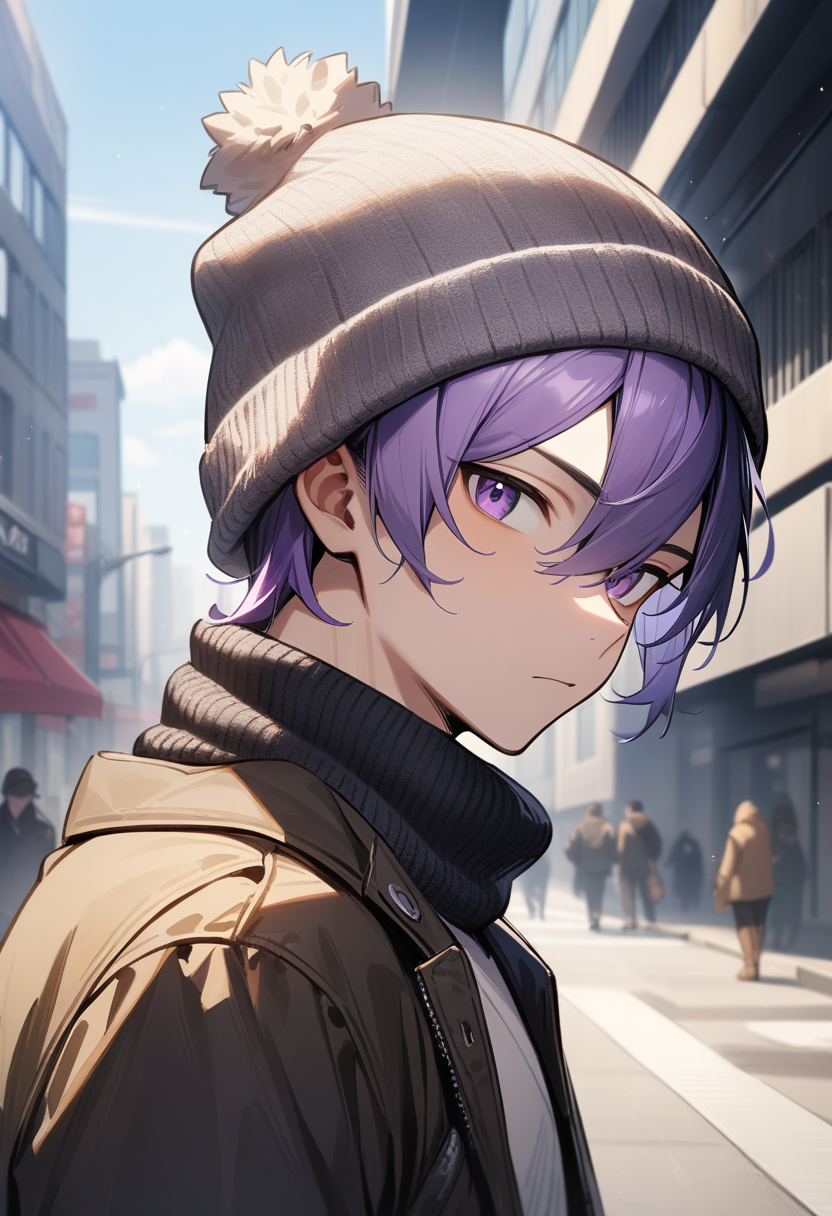

In [20]:

prompt = "1boy, male focus, violet hair, jacket , looking at viewer, upper body, beanie, outdoors, day, turtleneck, masterpiece, best quality, very aesthetic, absurdes"
negative_prompt = "nsfw, lowres, (bad), text, error, fewer, extra, missing, worst quality, jpeg artifacts, low quality, watermark, unfinished, displeasing, oldest, early, chromatic aberration, signature, extra digits, artistic error, username, scan, [abstract]"

image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    width=832,
    height=1216,
    guidance_scale=7,
    num_inference_steps=28
).images[0]
image


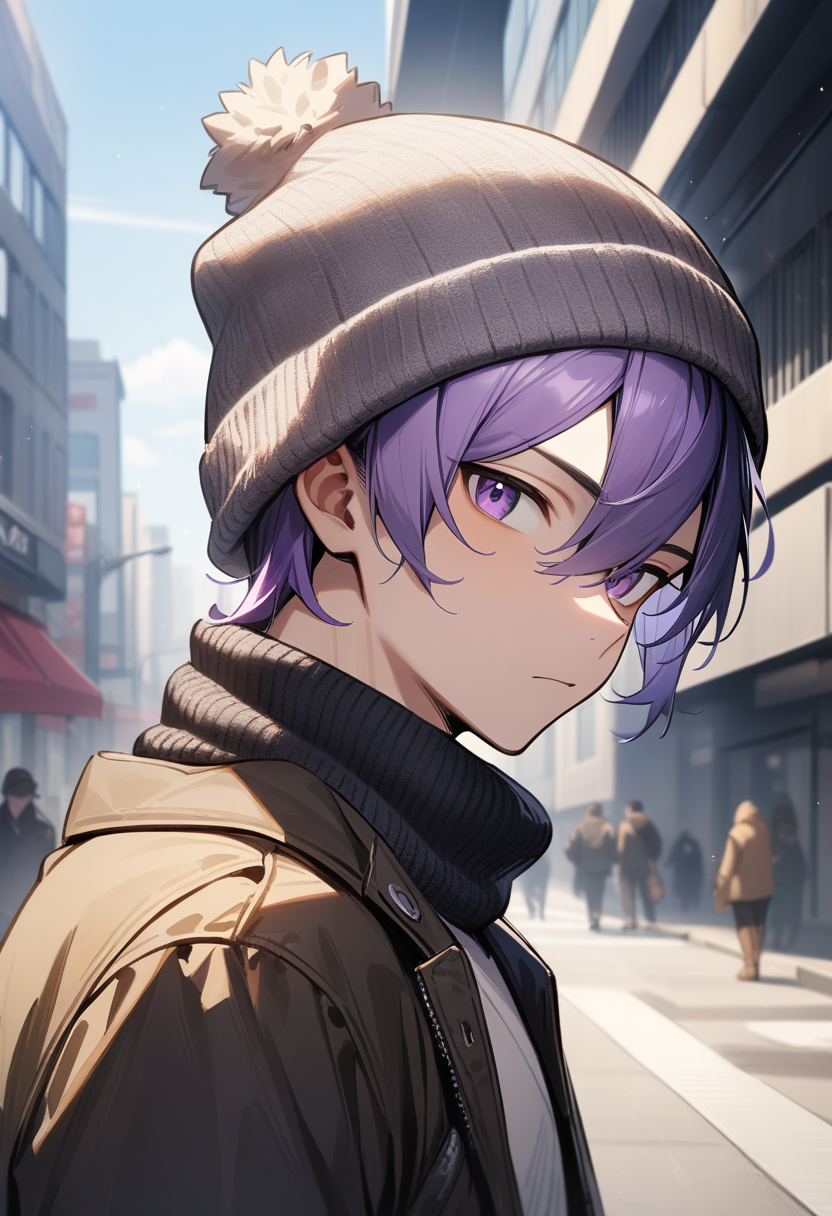

In [21]:
image

In [22]:
%%writefile app.py
import streamlit as st
import torch
from diffusers import DiffusionPipeline


pipe = DiffusionPipeline.from_pretrained(
    "cagliostrolab/animagine-xl-3.1",
    torch_dtype=torch.float16,
    use_safetensors=True,
)
pipe.to('cuda')
st.title("Anime Generator")
st.header("Generate Anime")
prompt=st.text_input("Prompt")

negative_prompt = "nsfw, lowres, (bad), text, error, fewer, extra, missing, worst quality, jpeg artifacts, low quality, watermark, unfinished, displeasing, oldest, early, chromatic aberration, signature, extra digits, artistic error, username, scan, [abstract]"

if st.button('Generate'):
    image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    width=832,
    height=1216,
    guidance_scale=7,
    num_inference_steps=28).images[0]
    st.image(image)


Overwriting app.py


In [11]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00


In [12]:
!wget -q -O - ipv4.icanhazip.com

34.143.157.204


In [23]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.143.157.204:8501

npx: installed 22 in 2.76s
your url is: https://dirty-mammals-pick.loca.lt
  Stopping...
^C


In [26]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

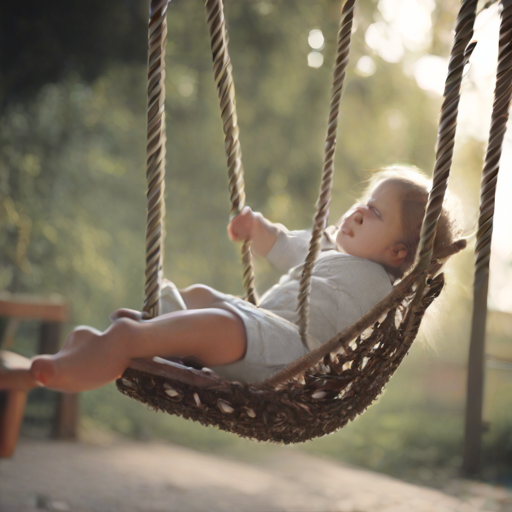

In [28]:

prompt = "a  girl is swinging on a cradle"

image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
image